In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70,4.0,130.0,322,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,NaN,67,3.0,115.0,564,0,2,NaN,0.0,1.6,NaN,0.0,7.0
2,1.0,57,2.0,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64,4.0,128.0,263,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74,2.0,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52,3.0,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44,2.0,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56,2.0,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57,4.0,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
int64		column 2	0
float64		column 3	14
float64		column 4	7
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	36
float64		column 9	21
float64		column 10	22
float64		column 11	36
float64		column 12	21
float64		column 13	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,263.000000,270.000000,256.000000,263.000000,270.000000,270.000000,270.000000,234.000000,249.000000,248.000000,234.000000,249.000000,263.000000
mean,0.684411,54.433333,3.164062,131.030418,249.659259,0.148148,1.022222,149.059829,0.333333,1.009677,1.589744,0.670683,4.726236
std,0.465636,9.109067,0.960207,17.554686,51.686237,0.355906,0.997891,23.634844,0.472354,1.078304,0.609705,0.931085,1.944152
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,152.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000


<AxesSubplot:>

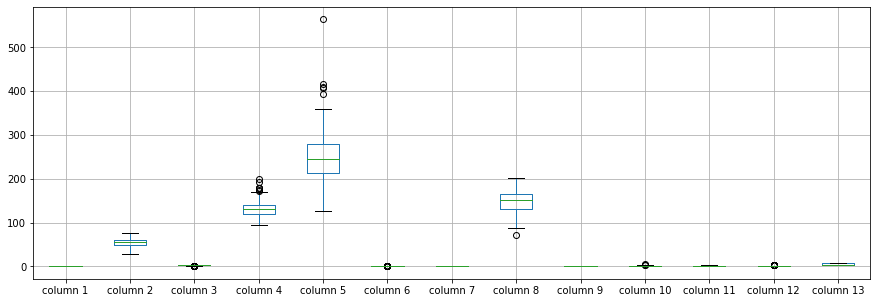

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.684411
column 2      54.433333
column 3       3.164062
column 4     131.030418
column 5     249.659259
column 6       0.148148
column 7       1.022222
column 8     149.059829
column 9       0.333333
column 10      1.009677
column 11      1.589744
column 12      0.670683
column 13      4.726236
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.095534,0.022597,-0.074780,-0.175701,0.030111,0.037604,-0.074395,0.170764,0.151930,0.039894,0.112675,0.398889
column 2,-0.095534,1.000000,0.089392,0.264469,0.220056,0.123458,0.128171,-0.410656,0.098208,0.192585,0.165789,0.361480,0.104729
column 3,0.022597,0.089392,1.000000,-0.003743,0.090640,-0.104428,0.065556,-0.344219,0.344861,0.151883,0.098561,0.201594,0.248594
column 4,-0.074780,0.264469,-0.003743,1.000000,0.152837,0.168468,0.103263,-0.081916,0.131582,0.160537,0.164098,0.088189,0.126542
column 5,-0.175701,0.220056,0.090640,0.152837,1.000000,0.025186,0.167652,-0.049000,0.095707,0.068549,0.024917,0.135020,0.026883
column 6,0.030111,0.123458,-0.104428,0.168468,0.025186,1.000000,0.053499,0.006374,0.007897,-0.022852,0.038842,0.090308,0.073992
column 7,0.037604,0.128171,0.065556,0.103263,0.167652,0.053499,1.000000,-0.067278,0.111207,0.105586,0.170185,0.117226,-0.004100
column 8,-0.074395,-0.410656,-0.344219,-0.081916,-0.049000,0.006374,-0.067278,1.000000,-0.371593,-0.364045,-0.364874,-0.287571,-0.274497
column 9,0.170764,0.098208,0.344861,0.131582,0.095707,0.007897,0.111207,-0.371593,1.000000,0.294820,0.228238,0.163097,0.335136
column 10,0.151930,0.192585,0.151883,0.160537,0.068549,-0.022852,0.105586,-0.364045,0.294820,1.000000,0.575086,0.246225,0.302380


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+88,13+88+88,13+88+88+88,13+88+88+88+88,13+88+88+88+88+88,13+88+88+88+88,13+88+88+88,13+88+88,13+88,13], vae_layer = False, seed = 88)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 583.6727180480957
Epoch: 1 , loss: 585.0239067077637
Epoch: 2 , loss: 582.7718925476074
Epoch: 3 , loss: 584.8770713806152
Epoch: 4 , loss: 584.0507278442383
Epoch: 5 , loss: 584.1160774230957
Epoch: 6 , loss: 582.9621047973633
Epoch: 7 , loss: 583.0169639587402
Epoch: 8 , loss: 583.5022087097168
Epoch: 9 , loss: 587.3789749145508
Epoch: 10 , loss: 580.6456108093262
Epoch: 11 , loss: 579.5027389526367
Epoch: 12 , loss: 577.2816352844238
Epoch: 13 , loss: 577.5911483764648
Epoch: 14 , loss: 574.1107330322266
Epoch: 15 , loss: 573.7120323181152
Epoch: 16 , loss: 568.4871673583984
Epoch: 17 , loss: 568.4850540161133
Epoch: 18 , loss: 565.76953125
Epoch: 19 , loss: 555.6971473693848
Epoch: 20 , loss: 527.0896892547607
Epoch: 21 , loss: 484.77116203308105
Epoch: 22 , loss: 455.51339530944824
Epoch: 23 , loss: 432.6122856140137
Epoch: 24 , loss: 415.94786834716797
Epoch: 25 , loss: 399.6823978424072
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.346394,0,0.0,0.0,0,0,0,-110.746643,0.0,0.0,-1.242645,0.0,0.0
2,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
266,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
267,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0
268,0.000000,0,0.0,0.0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(535.7721783031591, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.09894675499184509

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70,4.0,130.0,322,0,2,109.000000,0.0,2.4,2.000000,3.0,3.0
1,0.346394,67,3.0,115.0,564,0,2,49.253357,0.0,1.6,0.757355,0.0,7.0
2,1.000000,57,2.0,124.0,261,0,0,141.000000,0.0,0.3,1.000000,0.0,7.0
3,1.000000,64,4.0,128.0,263,0,0,105.000000,1.0,0.2,2.000000,1.0,7.0
4,0.000000,74,2.0,120.0,269,0,2,121.000000,1.0,0.2,1.000000,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52,3.0,172.0,199,1,0,162.000000,0.0,0.5,1.000000,0.0,7.0
266,1.000000,44,2.0,120.0,263,0,0,173.000000,0.0,0.0,1.000000,0.0,7.0
267,0.000000,56,2.0,140.0,294,0,2,153.000000,0.0,1.3,2.000000,0.0,3.0
268,1.000000,57,4.0,140.0,192,0,0,148.000000,0.0,0.4,2.000000,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_AL_5(imp).xlsx", index=False, header=False)